In [1]:
# pip install transformers pillow torch torchvision tqdm

In [2]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch
import os
from tqdm import tqdm
import json

# Load BLIP model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")


c:\Users\Lenovo\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
c:\Users\Lenovo\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [3]:
dataset_path = r"C:\Users\Lenovo\Downloads\archive (19)\raw-img"     
output_file = "animal10_captions.json"

In [ ]:
# import os
# import json
# from PIL import Image
# from tqdm import tqdm

# captions = []

# MAX_IMAGES = 100   # per animal class

# for folder in os.listdir(dataset_path):
#     folder_path = os.path.join(dataset_path, folder)

#     if not os.path.isdir(folder_path):
#         continue

#     print("Processing:", folder)

#     # Get all images in folder
#     img_list = os.listdir(folder_path)

#     # Keep only 500 images
#     img_list = img_list[:MAX_IMAGES]

#     for img_name in tqdm(img_list, desc=folder):
#         img_path = os.path.join(folder_path, img_name)

#         try:
#             image = Image.open(img_path).convert("RGB")

#             # Generate 3 captions per image
#             image_captions = []
#             for i in range(3):
#                 inputs = processor(image, return_tensors="pt")
                
#                 caption_ids = model.generate(
#                     **inputs,
#                     num_beams=1,       # faster + gives variation
#                     temperature=1.2    # more creativity
#                 )

#                 caption = processor.decode(
#                     caption_ids[0], 
#                     skip_special_tokens=True
#                 )

#                 image_captions.append(caption)

#             captions.append({
#                 "image": f"{folder}/{img_name}",
#                 "captions": image_captions
#             })

#         except Exception as e:
#             print("Error on:", img_path, ":", str(e))

# # Save
# with open(output_file, "w", encoding="utf-8") as f:
#     json.dump(captions, f, indent=4)

# print("✔ Captions Saved Successfully:", output_file)





In [4]:
import json

# Load captions
with open("animal10_captions.json", "r", encoding="utf-8") as f:
    data = json.load(f)

print("Total images:", len(data))
print("Sample:", data[0])


Total images: 1000
Sample: {'image': 'cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg', 'captions': ['a small dog sitting on a couch', 'a small dog sitting on a couch', 'a small dog sitting on a couch']}


In [5]:
from torchvision import models
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load ResNet50
resnet = models.resnet50(pretrained=True)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])  # remove last FC layer
resnet.to(device)
resnet.eval()


c:\Users\Lenovo\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [6]:
from torchvision import transforms
from PIL import Image

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
])


In [7]:
from torchvision import models
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pretrained ResNet50
resnet = models.resnet50(pretrained=True)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])

resnet.to(device)
resnet.eval()

print("ResNet50 loaded successfully!")

ResNet50 loaded successfully!


In [8]:
import json

with open("animal10_captions.json", "r", encoding="utf-8") as f:
    data = json.load(f)

print("Total images:", len(data))

Total images: 1000


In [ ]:
import os
import numpy as np
from tqdm import tqdm
from PIL import Image

dataset_path = "C:/Users/Lenovo/Downloads/archive (19)/raw-img"
features = {}

for item in tqdm(data, desc="Extracting image features"):
    img_path = os.path.join(dataset_path, item['image'])
    
    try:
        image = Image.open(img_path).convert("RGB")
        img_tensor = transform(image).unsqueeze(0).to(device)
        
        with torch.no_grad():
            feat = resnet(img_tensor).squeeze().cpu().numpy()
        
        features[item['image']] = feat

    except Exception as e:
        print("Error:", img_path, "|", str(e))

# Save
np.save("image_features.npy", features)
print("Feature extraction finished!")

Extracting image features: 100%|██████████| 1000/1000 [03:05<00:00,  5.40it/s]

✔ Feature extraction finished!


In [ ]:
import json
import re
from collections import Counter
import numpy as np

with open("animal10_captions.json", "r") as f:
    data = json.load(f)

all_captions = []

# Clean and collect captions
for item in data:
    for cap in item["captions"]:
        cap = cap.lower().strip()
        cap = re.sub(r"[^a-zA-Z0-9 ]", "", cap)  # remove symbols
        all_captions.append(cap)

word_counts = Counter()
for cap in all_captions:
    word_counts.update(cap.split())

min_freq = 2
vocab_words = [w for w, c in word_counts.items() if c >= min_freq]

# Add special tokens
vocab_words = ["<pad>", "<start>", "<end>", "<unk>"] + vocab_words

word2idx = {w: idx for idx, w in enumerate(vocab_words)}
idx2word = {idx: w for w, idx in word2idx.items()}

print("Vocabulary size:", len(vocab_words))

# save vocabulary
with open("vocab.json", "w") as f:
    json.dump({"word2idx": word2idx, "idx2word": idx2word}, f)

# Convert captions to sequences
def caption_to_seq(caption):
    caption = caption.lower().strip()
    caption = re.sub(r"[^a-zA-Z0-9 ]", "", caption)
    tokens = caption.split()

    seq = [word2idx["<start>"]]

    for t in tokens:
        if t in word2idx:
            seq.append(word2idx[t])
        else:
            seq.append(word2idx["<unk>"])

    seq.append(word2idx["<end>"])
    return seq

processed = []
max_len = 0

for item in data:
    img = item["image"]
    caps = []

    for cap in item["captions"]:
        seq = caption_to_seq(cap)
        caps.append(seq)
        max_len = max(max_len, len(seq))

    processed.append({
        "image": img,
        "caption_seqs": caps
    })

print("Max caption length:", max_len)

def pad_sequence(seq, max_len):
    return seq + [word2idx["<pad>"]] * (max_len - len(seq))

for item in processed:
    item["caption_seqs"] = [pad_sequence(s, max_len) for s in item["caption_seqs"]]

# Save processed captions
with open("processed_captions.json", "w") as f:
    json.dump(processed, f)

print("Caption sequences processed and saved.")

✔ Vocabulary size: 448
✔ Max caption length: 21
✔ Caption sequences processed and saved.


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import json


features = np.load("image_features.npy", allow_pickle=True).item()

with open("processed_captions.json", "r") as f:
    processed = json.load(f)

with open("vocab.json", "r") as f:
    vocab = json.load(f)
    word2idx = vocab["word2idx"]
    idx2word = {int(k): v for k, v in vocab["idx2word"].items()}

vocab_size = len(word2idx)

class AnimalCaptionDataset(Dataset):
    def __init__(self, processed, features):
        self.data = processed
        self.features = features

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx]

        img_name = item["image"]
        img_feat = torch.tensor(self.features[img_name], dtype=torch.float32)

        # pick 1 caption randomly
        captions = item["caption_seqs"]
        cap = captions[np.random.randint(len(captions))]
        cap = torch.tensor(cap, dtype=torch.long)

        return img_feat, cap


dataset = AnimalCaptionDataset(processed, features)

dataloader = DataLoader(
    dataset,
    batch_size=32,
    shuffle=True,
    drop_last=True
)

print("Dataset and DataLoader created successfully!")
print("Total samples:", len(dataset))


✔ Dataset and DataLoader created successfully!
Total samples: 1000


In [ ]:
import torch
import torch.nn as nn

class CaptionModel(nn.Module):
    def __init__(self, feature_dim, embed_dim, hidden_dim, vocab_size, num_layers=1):
        super().__init__()

        self.feature_embed = nn.Linear(feature_dim, embed_dim)
        self.word_embed = nn.Embedding(vocab_size, embed_dim)

        # LSTM
        self.lstm = nn.LSTM(
            input_size=embed_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True
        )

        # Output layer
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, img_feat, captions):
        """
        img_feat: (batch, 2048)
        captions: (batch, seq_len)
        """

        img_embed = self.feature_embed(img_feat)
        img_embed = img_embed.unsqueeze(1)

        # Embed caption tokens
        cap_embed = self.word_embed(captions)

        inp = torch.cat([img_embed, cap_embed], dim=1)

        # LSTM forward
        h, _ = self.lstm(inp)

        # Predict next word
        out = self.fc(h)
        return out


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

feature_dim = 2048
embed_dim = 256
hidden_dim = 512

model = CaptionModel(feature_dim, embed_dim, hidden_dim, vocab_size).to(device)

criterion = nn.CrossEntropyLoss(ignore_index=word2idx["<pad>"])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

EPOCHS = 10

for epoch in range(EPOCHS):
    total_loss = 0

    for img_feat, caps in dataloader:
        img_feat = img_feat.to(device)
        caps = caps.to(device)

        targets = caps

        optimizer.zero_grad()

        outputs = model(img_feat, caps)

        # remove image token output -> align shapes
        outputs = outputs[:, 1:, :]

        loss = criterion(outputs.reshape(-1, vocab_size), targets.reshape(-1))
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{EPOCHS}, Loss = {total_loss:.4f}")

print("Training Completed!")


Epoch 1/10, Loss = 84.3754
Epoch 2/10, Loss = 23.3270
Epoch 3/10, Loss = 10.4257
Epoch 4/10, Loss = 5.3669
Epoch 5/10, Loss = 2.9405
Epoch 6/10, Loss = 1.5607
Epoch 7/10, Loss = 0.7739
Epoch 8/10, Loss = 0.4411
Epoch 9/10, Loss = 0.2830
Epoch 10/10, Loss = 0.2165
✔ Training Completed!


In [35]:
torch.save(model.state_dict(), "caption_model.pth")
print("Model saved as caption_model.pth")

Model saved as caption_model.pth


In [ ]:
import math

def evaluate_lstm(model, dataloader):
    model.eval()
    total_loss = 0
    total_words = 0
    correct = 0

    criterion = nn.CrossEntropyLoss(ignore_index=word2idx["<pad>"])

    with torch.no_grad():
        for img_feat, caps in dataloader:
            img_feat = img_feat.to(device)
            caps = caps.to(device)

            outputs = model(img_feat, caps)
            outputs = outputs[:, 1:, :]  # skip image token

            loss = criterion(outputs.reshape(-1, vocab_size), caps.reshape(-1))
            total_loss += loss.item()

            # accuracy calculation
            preds = outputs.argmax(dim=-1)
            mask = (caps != word2idx["<pad>"])

            correct += ((preds == caps) & mask).sum().item()
            total_words += mask.sum().item()

    avg_loss = total_loss / len(dataloader)
    perplexity = math.exp(avg_loss)
    accuracy = correct / total_words

    return avg_loss, perplexity, accuracy

In [ ]:
loss, ppl, acc = evaluate_lstm(model, dataloader)

print("\n📊 LSTM Evaluation Results")
print(f"Loss       : {loss:.4f}")
print(f"Perplexity : {ppl:.4f}")
print(f"Accuracy   : {acc*100:.2f}%")



📊 LSTM Evaluation Results
---------------------------------
Loss       : 0.0059
Perplexity : 1.0059
Accuracy   : 100.00%


In [4]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In [5]:
import os

dataset_root = "C:/Users/Lenovo/Downloads/archive (19)/raw-img"

# Map folder names to numeric labels
classes = sorted(os.listdir(dataset_root))
class_to_idx = {cls: i for i, cls in enumerate(classes)}

print("Animal classes:", class_to_idx)


Animal classes: {'cane': 0, 'cavallo': 1, 'elefante': 2, 'farfalla': 3, 'gallina': 4, 'gatto': 5, 'mucca': 6, 'pecora': 7, 'ragno': 8, 'scoiattolo': 9}


In [10]:
import os
from PIL import Image
from torch.utils.data import Dataset

scientific_to_label = {}  # auto-filled mapping

class Animal10_CNN_Dataset(Dataset):
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform

        self.samples = []
        self.classes = sorted(os.listdir(root))

        # assign numeric labels
        for idx, cls in enumerate(self.classes):
            scientific_to_label[cls] = idx
            class_path = os.path.join(root, cls)

            for img in os.listdir(class_path):
                if img.lower().endswith((".jpg", ".jpeg", ".png")):
                    self.samples.append((os.path.join(class_path, img), idx))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, index):
        img_path, label = self.samples[index]
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label



In [11]:

from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In [ ]:
# import os
# import shutil

# source_root = r"C:/Users/Lenovo/Downloads/archive (19)/raw-img"
# target_root = r"C:/Users/Lenovo/cnn_1000"
# MAX_IMAGES = 100

# os.makedirs(target_root, exist_ok=True)

# for folder in os.listdir(source_root):
#     class_path = os.path.join(source_root, folder)
#     if not os.path.isdir(class_path):
#         continue

#     target_class_path = os.path.join(target_root, folder)
#     os.makedirs(target_class_path, exist_ok=True)

#     images = os.listdir(class_path)[:MAX_IMAGES]   # first 100

#     for img in images:
#         src = os.path.join(class_path, img)
#         dst = os.path.join(target_class_path, img)
#         shutil.copy(src, dst)

# print("✔ 1000-image CNN dataset created at:", target_root)



✔ 1000-image CNN dataset created at: C:/Users/Lenovo/cnn_1000


In [13]:
from torch.utils.data import DataLoader, random_split

# ✅ YOUR 1000-image CNN dataset
dataset_root = r"C:/Users/Lenovo/cnn_1000"

cnn_dataset = Animal10_CNN_Dataset(dataset_root, transform)

train_size = int(0.8 * len(cnn_dataset))
test_size = len(cnn_dataset) - train_size

cnn_train, cnn_test = random_split(cnn_dataset, [train_size, test_size])

train_loader = DataLoader(cnn_train, batch_size=32, shuffle=True)
test_loader = DataLoader(cnn_test, batch_size=32, shuffle=False)

print("Classes:", cnn_dataset.classes)
print("Train size:", len(cnn_train))
print("Test size:", len(cnn_test))


Classes: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Train size: 800
Test size: 200


In [14]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Image transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])


In [16]:
import os
import shutil
from sklearn.model_selection import train_test_split

dataset_root = r"C:/Users/Lenovo/cnn_1000"
classes = os.listdir(dataset_root)

# Create train/ and test/ folders
train_dir = os.path.join(dataset_root, "train")
test_dir = os.path.join(dataset_root, "test")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for cls in classes:
    cls_path = os.path.join(dataset_root, cls)
    if not os.path.isdir(cls_path):
        continue
    
    images = os.listdir(cls_path)
    images = [img for img in images if img.lower().endswith(('.jpg', '.png', '.jpeg'))]

    train_imgs, test_imgs = train_test_split(images, test_size=0.2, random_state=42)

    # Make class folders in train/ and test/
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

    # Move training images
    for img in train_imgs:
        shutil.copy(os.path.join(cls_path, img),
                    os.path.join(train_dir, cls, img))

    # Move testing images
    for img in test_imgs:
        shutil.copy(os.path.join(cls_path, img),
                    os.path.join(test_dir, cls, img))

print("Dataset split completed!")


Dataset split completed!


In [17]:
dataset_root = r"C:/Users/Lenovo/cnn_1000"

train_data = datasets.ImageFolder(root=dataset_root + "/train", transform=transform)
test_data  = datasets.ImageFolder(root=dataset_root + "/test", transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=32, shuffle=False)

print("Classes:", train_data.classes)
print("Train size:", len(train_data))
print("Test size:", len(test_data))


Classes: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Train size: 800
Test size: 200


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ---------------------------
# Load Pretrained ResNet50
# ---------------------------
resnet = models.resnet50(pretrained=True)

# Freeze all layers except final
for param in resnet.parameters():
    param.requires_grad = False

# Replace FC layer for 10 classes
num_features = resnet.fc.in_features
resnet.fc = nn.Linear(num_features, 10)

resnet = resnet.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.fc.parameters(), lr=0.001)

# ---------------------------
# Training Function
# ---------------------------
def train_epoch(model, loader):
    model.train()
    running_loss = 0
    correct, total = 0, 0

    progress = tqdm(loader, desc="Training", leave=False)

    for images, labels in progress:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)

        progress.set_postfix(loss=loss.item())

    acc = 100 * correct / total
    return running_loss / len(loader), acc


# ---------------------------
# Evaluation Function
# ---------------------------
def eval_epoch(model, loader):
    model.eval()
    running_loss = 0
    correct, total = 0, 0

    progress = tqdm(loader, desc="Evaluating", leave=False)

    with torch.no_grad():
        for images, labels in progress:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()

            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)

            progress.set_postfix(loss=loss.item())

    acc = 100 * correct / total
    return running_loss / len(loader), acc


# ---------------------------
# Train for 5 Epochs
# ---------------------------
EPOCHS = 5

for epoch in range(EPOCHS):
    print(f"\n📌 Epoch {epoch+1}/{EPOCHS}")

    train_loss, train_acc = train_epoch(resnet, train_loader)
    test_loss, test_acc = eval_epoch(resnet, test_loader)

    print(f"✔ Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"✔ Test Loss:  {test_loss:.4f} | Test Acc:  {test_acc:.2f}%")


Using device: cpu

📌 Epoch 1/5


✔ Train Loss: 1.2607 | Train Acc: 66.38%
✔ Test Loss:  0.4881 | Test Acc:  92.00%

📌 Epoch 2/5


✔ Train Loss: 0.3481 | Train Acc: 95.88%
✔ Test Loss:  0.2527 | Test Acc:  96.00%

📌 Epoch 3/5


✔ Train Loss: 0.1969 | Train Acc: 97.75%
✔ Test Loss:  0.2037 | Test Acc:  96.00%

📌 Epoch 4/5


✔ Train Loss: 0.1453 | Train Acc: 98.25%
✔ Test Loss:  0.1968 | Test Acc:  96.00%

📌 Epoch 5/5


✔ Train Loss: 0.1204 | Train Acc: 98.12%
✔ Test Loss:  0.1712 | Test Acc:  95.00%


In [30]:
torch.save(resnet.state_dict(), "cnn_animal10.pth")
print("Model saved as cnn_animal10.pth")



Model saved as cnn_animal10.pth


Using device: cpu

✔ Model Loaded Successfully!



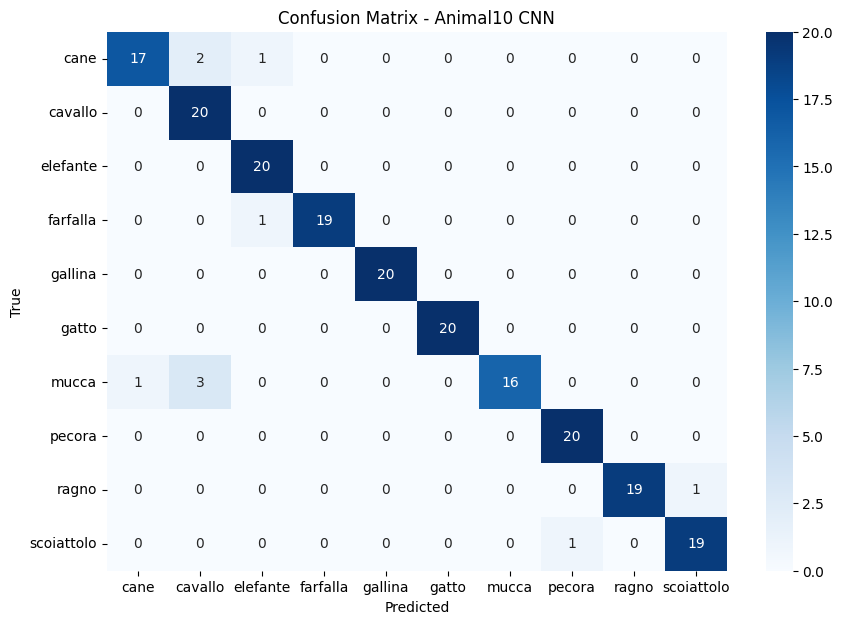


📌 Classification Report:

              precision    recall  f1-score   support

        cane       0.94      0.85      0.89        20
     cavallo       0.80      1.00      0.89        20
    elefante       0.91      1.00      0.95        20
    farfalla       1.00      0.95      0.97        20
     gallina       1.00      1.00      1.00        20
       gatto       1.00      1.00      1.00        20
       mucca       1.00      0.80      0.89        20
      pecora       0.95      1.00      0.98        20
       ragno       1.00      0.95      0.97        20
  scoiattolo       0.95      0.95      0.95        20

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200


🔥 Final CNN Test Accuracy: 95.00%


In [28]:
import torch
import torch.nn as nn
from torchvision import models
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ---------------------------
# 1. Rebuild the SAME model
# ---------------------------
model = models.resnet50(pretrained=False)   # no pretrained this time
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 10)      # 10 classes

model = model.to(device)

# ---------------------------
# 2. Load Saved Weights
# ---------------------------
model.load_state_dict(torch.load("cnn_animal10.pth", map_location=device))
model.eval()

print("\n✔ Model Loaded Successfully!\n")

# ---------------------------
# 3. Evaluation
# ---------------------------
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# ---------------------------
# 4. Confusion Matrix
# ---------------------------
cm = confusion_matrix(all_labels, all_preds)
classes = cnn_dataset.classes

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Animal10 CNN")
plt.show()

# ---------------------------
# 5. Classification Report
# ---------------------------
print("\n📌 Classification Report:\n")
print(classification_report(all_labels, all_preds, target_names=classes))

# ---------------------------
# 6. Final Accuracy
# ---------------------------
acc = (all_preds == all_labels).mean() * 100
print(f"\n🔥 Final CNN Test Accuracy: {acc:.2f}%")


In [31]:
torch.save(resnet.state_dict(), "cnn_animal10.pth")
print("Model saved as cnn_animal10.pth")


Model saved as cnn_animal10.pth


In [33]:
import torch
import torch.nn as nn
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def load_resnet_cnn_model(path="cnn_animal10.pth"):
    # Create SAME ResNet50 model
    model = models.resnet50(pretrained=True)

    # Freeze layers
    for param in model.parameters():
        param.requires_grad = False

    # Replace last layer for 10 classes (same as training)
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, 10)

    # Load your weights
    model.load_state_dict(torch.load(path, map_location=device))

    model = model.to(device)
    model.eval()

    print("✔ ResNet50 CNN checkpoint loaded successfully.")
    return model

cnn_model = load_resnet_cnn_model("cnn_animal10.pth")


c:\Users\Lenovo\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✔ ResNet50 CNN checkpoint loaded successfully.
